In [1]:
'''Task 1: Setting Up AWS Resources
Instructions:
• Begin by importing the AWS SDK for Python (boto3) and other necessary libraries.
• Use the AWS SDK to establish a session and obtain the execution role for your AWS account.
• Use the bucket name: employee-data
• Use SageMaker library to set the execution roles to access the data from $3
bucket.
Hints:
• You might need to look up how to use boto3 client ('s3') to interact with the 53 service.'''

"Task 1: Setting Up AWS Resources\nInstructions:\n• Begin by importing the AWS SDK for Python (boto3) and other necessary libraries.\n• Use the AWS SDK to establish a session and obtain the execution role for your AWS account.\n• Use the bucket name: employee-data\n• Use SageMaker library to set the execution roles to access the data from $3\nbucket.\nHints:\n• You might need to look up how to use boto3 client ('s3') to interact with the 53 service."

In [114]:
#Importing necessary libraries and SDK's 

import sagemaker
import pandas as pd 
import matplotlib.pyplot as plt
import boto3 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import tempfile


In [48]:
#Establishing a boto3 session 
session = boto3.Session()


In [49]:
#Getting execution role 
sts_identity = boto3.client('sts')
caller_identity = sts_identity.get_caller_identity()
execution_role = caller_identity['Arn']
print("Exection Role is ",execution_role)

Exection Role is  arn:aws:sts::637423581679:assumed-role/sage-s3full/SageMaker


In [50]:
#Accessing the csv file situated in S3 by using AWS SDK (boto3)
s3_client = boto3.client('s3')
bucket_name = 'employeedataset12'
object_key = 'Employee.csv' # is the path to the file inside s3 bucket

#Downloading the csv file from s3 bucket onto sagemaker environment
s3_client.download_file(bucket_name,object_key,'Employee.csv')
print('file downloaded sucessfully')

file downloaded sucessfully


In [51]:
#Reading the downloaded CSV as pandas dataframe
df = pd.read_csv('Employee.csv')

In [52]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [53]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [54]:
'''Task 3: Data Analysis and Visualization

Instructions:
• Verify and print the number of duplicate records if exists and 
the shape of the DataFrame after cleaning to ensure the dataset is ready for analysis.
• Create a pie chart to visualize the distribution of values in the 'gender'
column.
• Use seaborn to generate a count plot for the education
• When creating visualizations, setting parameters like figsize can help improve the readability of the''''

SyntaxError: unterminated string literal (detected at line 9) (2558106506.py, line 9)

In [55]:
#printing duplicate rows

duplicates = df[df.duplicated()]
print(duplicates)

      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
111   Bachelors         2017       Pune            2   27  Female          No   
130   Bachelors         2017  Bangalore            3   26  Female          No   
138   Bachelors         2017  New Delhi            3   28    Male          No   
160   Bachelors         2014  Bangalore            3   28  Female          No   
167   Bachelors         2014  Bangalore            3   25    Male          No   
...         ...          ...        ...          ...  ...     ...         ...   
4640  Bachelors         2015  Bangalore            3   35    Male          No   
4642  Bachelors         2012  Bangalore            3   36  Female          No   
4646  Bachelors         2013  Bangalore            3   25  Female          No   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDo

In [56]:
#printing the shape of a dataframe
df.shape

(4653, 9)

In [57]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


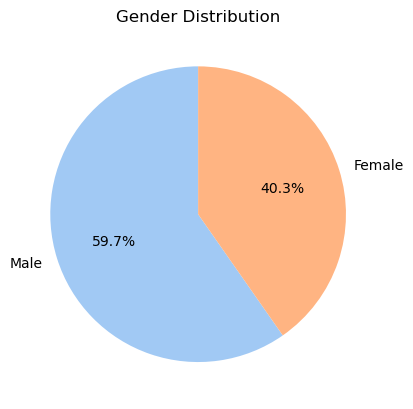

In [58]:
# creating a pie chart with the column gender
gcount = df['Gender'].value_counts()
plt.pie(
    gcount, 
    labels=gcount.index, 
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Rotate the chart
    colors=sns.color_palette('pastel')  # Use a seaborn color palette
)
plt.title('Gender Distribution')
plt.show()

/tmp/ipykernel_7176/2685802411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data = df, palette ='pastel')


<Axes: xlabel='Education', ylabel='count'>

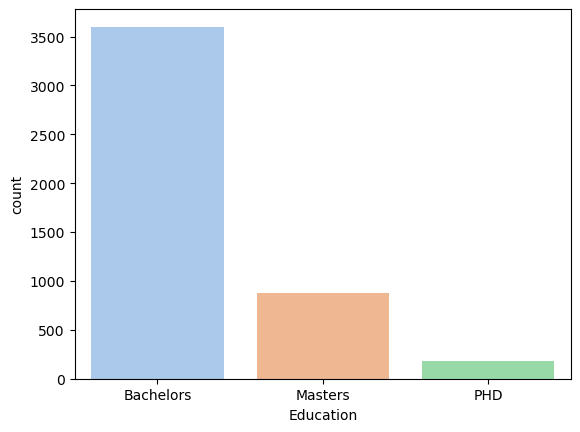

In [59]:
# generating a count plot with seaborn on education

sns.countplot(x='Education', data = df, palette ='pastel')

In [ ]:
'''Task 4: Feature Engineering
Instructions:
• Split the data based on the independent and dependent variables and store it in for example X and y.
• Transform the columns in the data X using sklearn's column transfer technique and preprocess them using 
   one hot encoder & passthrough methods.


In [62]:
# Splitting the data in to X (independent Variables) and Y (dependendent variables)

Y = df['LeaveOrNot']
X = df.drop(columns=['LeaveOrNot']) 
X.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,Bachelors,2017,Bangalore,3,34,Male,No,0
1,Bachelors,2013,Pune,1,28,Female,No,3
2,Bachelors,2014,New Delhi,3,38,Female,No,2
3,Masters,2016,Bangalore,3,27,Male,No,5
4,Masters,2017,Pune,3,24,Male,Yes,2


In [63]:
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: LeaveOrNot, dtype: int64

In [67]:
X.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
dtype: object

In [74]:
catcols = X.select_dtypes(include =['object']).columns
numercols = X.select_dtypes(include = ['int64']).columns
print(catcols,numercols)

Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object') Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain'], dtype='object')


In [83]:
# Applying column transformer

column_transformer = ColumnTransformer(
    transformers =[
        ('onehot',OneHotEncoder(),catcols),
        ('passthrough','passthrough',numercols)
    ]
)
X_transformed = column_transformer.fit_transform(X)
X_transformed

array([[ 1.,  0.,  0., ...,  3., 34.,  0.],
       [ 1.,  0.,  0., ...,  1., 28.,  3.],
       [ 1.,  0.,  0., ...,  3., 38.,  2.],
       ...,
       [ 0.,  1.,  0., ...,  3., 27.,  5.],
       [ 1.,  0.,  0., ...,  3., 30.,  2.],
       [ 1.,  0.,  0., ...,  3., 33.,  4.]])

In [ ]:
'''Task 5: Creating the model
Instructions:
• Split your data into training and testing sets using train _test_split from seikit-learn with 
a test size of 20% and random state of "0". Use the feature engineered data ie X
selected
• Feature scale the X_train and X_test data using Sklearn's standard scaler.
• Build a LogisticRegression model using scikit-learn with a random state of "0".
* Get the predicted value and store it in a variable such as 'Y pred'.
• Evaluate models using metrics such as accuracy, precision, recall score and F1-score.
* Plot a heatmap of the confusion matrix against the actual and the predicted values for more insights.'''

In [93]:
#splitting X_transofrmed and Y into training and testing sets 
X_train,X_test,Y_train,Y_test = train_test_split(X_transformed,Y, test_size=0.2, random_state=0)

In [94]:
# Print the shapes of the training and testing sets
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Target Shape:", Y_train.shape)
print("Test Target Shape:", Y_test.shape)

Training Features Shape: (3722, 14)
Test Features Shape: (931, 14)
Training Target Shape: (3722,)
Test Target Shape: (931,)


In [95]:
# Scaling X_train and X_test using standardscaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scaling on training data
X_test_scaled = scaler.transform(X_test) 

In [97]:
#building a logistic regression model 
logreg = LogisticRegression(random_state=0)

In [98]:
#training the model
logreg.fit(X_train_scaled,Y_train)

LogisticRegression(random_state=0)

In [99]:
# predicting using the model 

Y_pred = logreg.predict(X_test_scaled)

In [102]:
print(Y_pred)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1
 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 1 0 1 0 0 0 

In [105]:
# evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.723952738990333
Precision: 0.6328502415458938
Recall: 0.4198717948717949
F1 Score: 0.5048169556840078


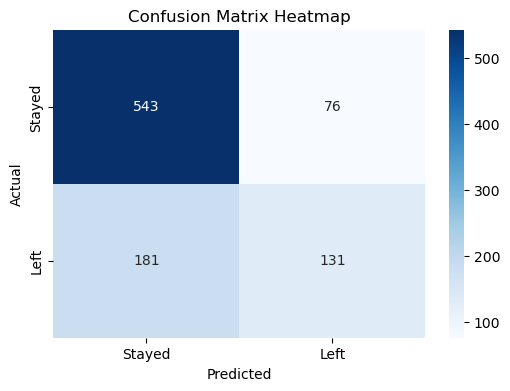

In [108]:
# confusion matrix and heat map

cm = confusion_matrix(Y_test, Y_pred)
#Plot the confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
'''Task 6: Deploying a Machine Learning Model
Instructions:
• Serialize your trained logistic regression model using joblib or a similar library and store it 
in the specified S3 bucket, i.e employee-data.
• Using the tempfile library, along with joblib generate a pickle file of the final model 
we have created. With the help of s3_client, push the pickle file to the 53 folder named 
ml-output inside the bucket employee-data and print a confirmation message as an output to verify.'''

In [112]:
# Serialize the trained model using joblib
model_filename = 'logreg.pkl'
joblib.dump(logreg, model_filename)

# Step 6: Upload the serialized model to S3
s3_client = boto3.client('s3')

# Specify the S3 bucket and key (path within the bucket)
bucket_name = 'employeedataset12'
s3_key = 'models/logreg_model.pkl'

# Upload the model file to the S3 bucket
s3_client.upload_file(model_filename, bucket_name, s3_key)

print(f"Model has been uploaded to s3://{bucket_name}/{s3_key}")

Model has been uploaded to s3://employeedataset12/models/logreg_model.pkl


In [ ]:
'''Task 7: Prediction using the deployed model
Instructions:
• With the similar approach of pushing the pickle file to the 53 bucket, using tempfile 
and joblib, download the pickle file and load it in a variable for example model.
• Fit the newly loaded model and run predictions on the testing data and store it in some 
variable to calculate the metrics.
• Execute a prediction using the test dataset and compute the accuracy of the model using standard'''

In [115]:
# Create a temporary file using tempfile
with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
    # Download the pickle file from S3 to the temporary file
    s3_client.download_file(bucket_name, s3_key, tmp_file.name)
    
    # Load the model from the temporary file using joblib
    model = joblib.load(tmp_file.name)

# Now 'model' contains your deserialized Logistic Regression model
print("Model has been loaded successfully.")

Model has been loaded successfully.


In [117]:


# Assuming X_test and y_test are already defined (your testing features and labels)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print out the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7240
Precision: 0.6329
Recall: 0.4199
F1-score: 0.5048
